In [0]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

In [5]:
 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


###Pie Chart

In [0]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [7]:
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


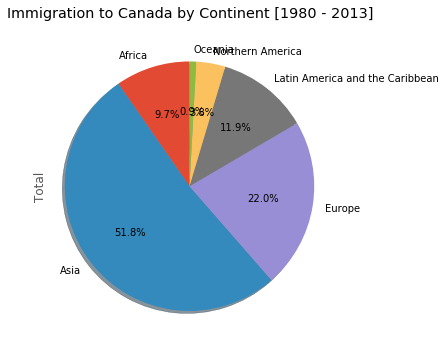

In [8]:
df_continents['Total'].plot(kind='pie', figsize=(5,6), autopct='%1.1f%%', startangle=90, shadow=True,)

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')

plt.show()

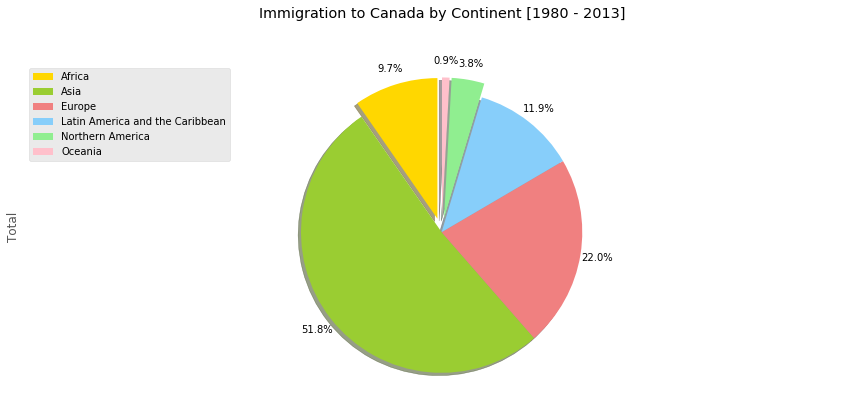

In [9]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90,shadow=True,labels=None, pctdistance=1.12,colors=colors_list,explode=explode_list) 

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

####Box Plot

In [10]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


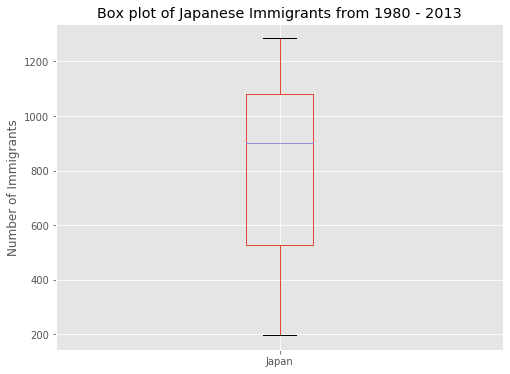

In [11]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [12]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [13]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


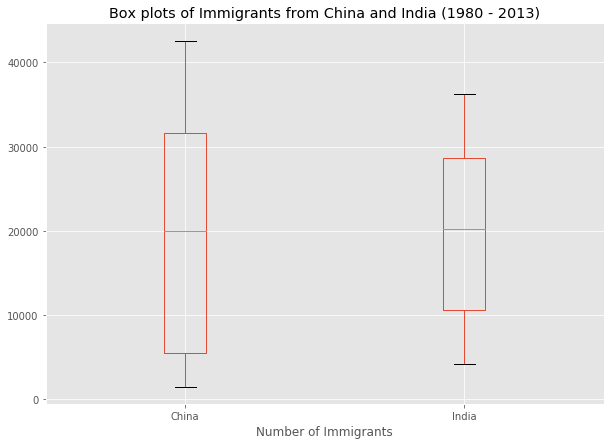

In [14]:
df_CI.plot(kind='box', figsize = (10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

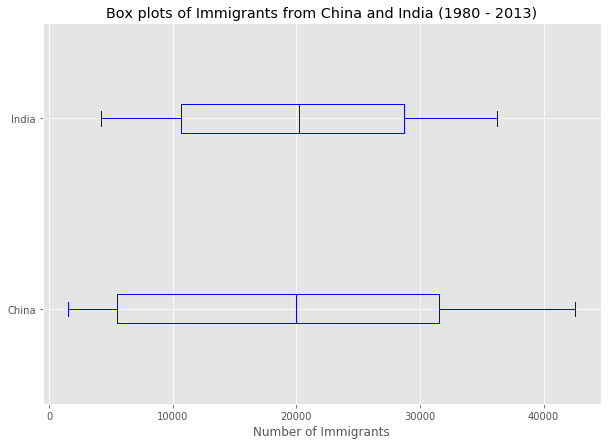

In [15]:
#horizontal box plot
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

###Scatter Plot

In [16]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


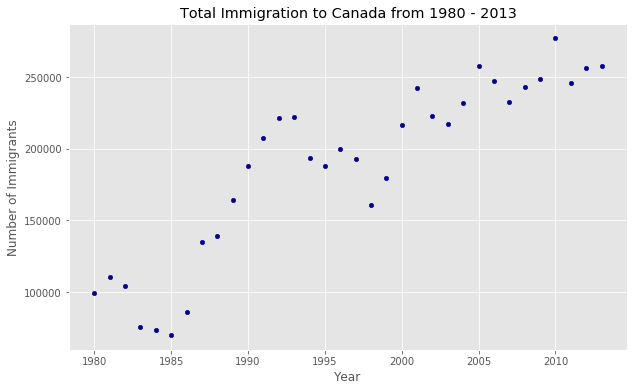

In [17]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [18]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

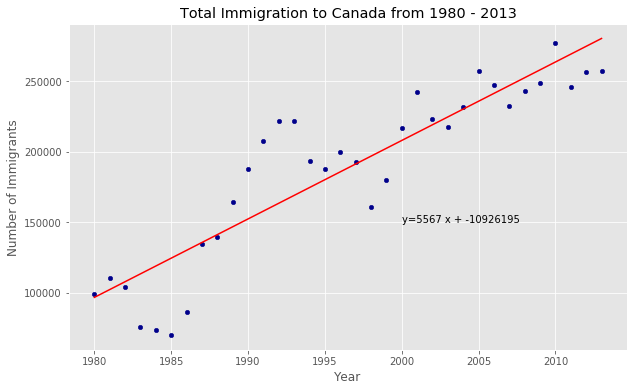

'No. Immigrants = 5567 * Year + -10926195'

In [19]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

#### Bubble Plot

In [20]:
df_can_t = df_can[years].transpose() 
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,"China, Hong Kong Special Administrative Region","China, Macao Special Administrative Region",...,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,702,234,0,26,0,83,372,0,511,16,2,0,44,0,10,211,79,24,2,0,1,12,9,0,4,0,1233,5123,0,0,...,6,241,0,0,7,1026,211,185,0,20,15,4,281,806,315,0,56,0,5,2,958,58,481,0,0,13,0,0,22045,635,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,639,238,0,23,2,84,376,0,540,27,5,0,52,0,1,220,6,20,1,0,1,19,2,0,3,0,1069,6682,0,0,...,6,301,0,0,10,1118,299,371,0,12,10,1,308,811,419,0,53,0,5,4,947,51,874,0,1,16,0,2,24796,832,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,484,201,0,38,1,86,299,0,519,13,4,0,42,0,3,192,8,12,3,0,2,26,16,0,1,1,1078,3308,0,0,...,7,337,0,0,7,781,260,290,0,11,21,1,222,634,409,0,113,0,2,7,972,55,706,0,0,17,0,2,20620,621,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,317,117,0,12,1,81,244,0,297,21,3,0,49,0,3,139,2,33,2,0,0,33,7,0,0,0,781,1863,0,0,...,3,169,0,0,12,379,133,197,0,7,12,0,176,370,269,0,65,0,3,1,766,46,280,0,0,38,0,1,10015,474,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,317,127,0,21,1,98,265,0,183,37,4,1,38,0,7,145,2,11,3,1,11,10,8,0,0,0,681,1527,0,0,...,12,128,0,0,14,271,137,1086,0,23,5,10,128,326,264,0,82,0,6,2,606,51,338,0,1,32,0,2,10170,473,6661,90,0,0,142,7583,0,0,16,32


In [0]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

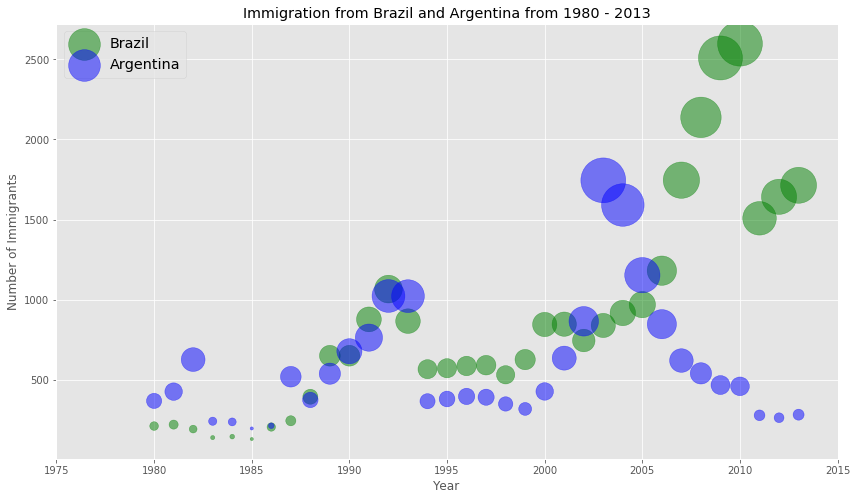

In [22]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                 
                    color='green',
                    s=norm_brazil * 2000 + 10,  
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [0]:
#Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013.

norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

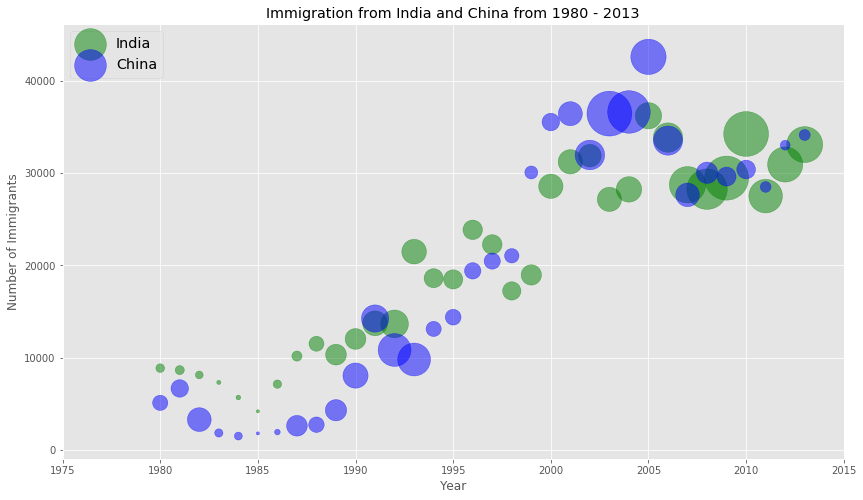

In [24]:
# India
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    figsize=(14, 8),
                    alpha=0.5,                 
                    color='green',
                    s=norm_brazil * 2000 + 10,  
                    xlim=(1975, 2015)
                   )

# China
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from India and China from 1980 - 2013')
ax0.legend(['India', 'China'], loc='upper left', fontsize='x-large')